In [ ]:
import time
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

"""
                The version developer"""



########################
mesaj = "TheVersionDeveloper,v2 2023"
print(mesaj)
time.sleep(5)
########################
mesaj2 = "Veriler Yahoo Finance'den alınmıştır,bu yüzden borsa isimlerini bu siteye göre yazınız."
print(mesaj2)
time.sleep(5)
########################
borsa_sembolu = input("Lütfen borsa sembolünü giriniz: ")
baslangic_tarihi = input("Lütfen başlangıç tarihini giriniz: ")
bitis_tarihi = input("Lütfen bitiş tarihini giriniz: ")
Varlik = yf.download(borsa_sembolu, start=baslangic_tarihi, end=bitis_tarihi, interval='1d')
BTC_USD = Varlik



BTC_USD.head()

fig, ax = plt.subplots(dpi=500)


date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()


ax.plot(BTC_USD['Close'], lw=0.75)


ax.set_ylabel(borsa_sembolu)
ax.set_title(borsa_sembolu)
ax.grid() # adding a grid


plt.show()


BTC_USD['SMA_9'] = BTC_USD['Close'].rolling(window=9, min_periods=1).mean()


BTC_USD['SMA_30'] = BTC_USD['Close'].rolling(window=30, min_periods=1).mean()


BTC_USD.tail()

fig, ax = plt.subplots(dpi=500)

date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

ax.plot(BTC_USD['Close'], lw=0.75, label='Kapanış Fiyatı') 

"""

"""
ax.plot(BTC_USD['SMA_9'], lw=0.75, alpha=0.75, label='9 Günlük Ortalama')
ax.plot(BTC_USD['SMA_30'], lw=0.75, alpha=0.75, label='30 Günlük Ortalama')



ax.set_ylabel(borsa_sembolu)
ax.set_title(borsa_sembolu)
ax.grid() # adding a grid
ax.legend() # adding a legend


plt.show()


trade_signals = pd.DataFrame(index=BTC_USD.index)


short_interval = 10
long_interval = 40


trade_signals['Short'] = BTC_USD['Close'].rolling(window=short_interval, min_periods=1).mean()
trade_signals['Long'] = BTC_USD['Close'].rolling(window=long_interval, min_periods=1).mean()


trade_signals['Signal'] = 0.0


trade_signals['Signal'] = np.where(trade_signals['Short'] > trade_signals['Long'], 1.0, 0.0)   
trade_signals['Position'] = trade_signals['Signal'].diff()

fig, ax = plt.subplots(dpi=500)


date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()



ax.plot(BTC_USD['Close'], lw=0.75, label='Kapanış Fiyatı')


ax.plot(trade_signals['Short'], lw=0.75, alpha=0.75, color='green', label='Kısa Vadeli SMA')


ax.plot(trade_signals['Long'], lw=0.75, alpha=0.75, color='red', label='Uzun Vadeli SMA')



ax.plot(trade_signals.loc[trade_signals['Position']==1.0].index, trade_signals.Short[trade_signals['Position'] == 1.0],
 marker=6, ms=4, linestyle='none', color='green')


ax.plot(trade_signals.loc[trade_signals['Position'] == -1.0].index, trade_signals.Short[trade_signals['Position'] == -1.0],
 marker=7, ms=4, linestyle='none', color='red')



ax.set_ylabel(borsa_sembolu)
ax.set_title(borsa_sembolu)
ax.grid() 
ax.legend() 


plt.show()

initial_balance = 10000.0 

backtest = pd.DataFrame(index=trade_signals.index)

backtest['BTC_Return'] = BTC_USD['Close'].shift(1)

backtest['Alg_Return'] = np.where(trade_signals.Signal == 1, backtest.BTC_Return, 1.0)

backtest['Balance'] = initial_balance * backtest.Alg_Return.cumprod()


fig, ax = plt.subplots(dpi=500)


date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()


ax.plot(initial_balance*backtest.BTC_Return.cumprod(), lw=0.75, alpha=0.75, label='Satın al ve tut')


ax.plot(backtest['Balance'], lw=0.75, alpha=0.75, label='Ortalamayı geçme')

ax.set_ylabel(borsa_sembolu)
ax.set_title('Varlık Değeri')
ax.grid()
ax.legend() 


plt.show()

RSİ hesaplayıcıya hoşgeldiniz.
TheVersionDeveloper 2023 v1
Veriler Yahoo Finance'den alınmıştır,bu yüzden borsa isimlerini bu siteye göre yazınız.
[*********************100%%**********************]  1 of 1 completed


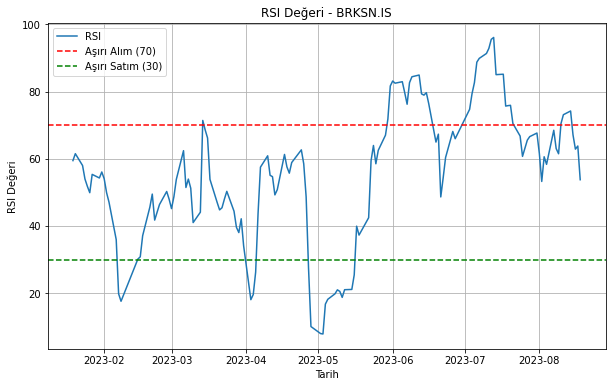

In [18]:
import yfinance as yf
import matplotlib.pyplot as plt
import time
#RSİ CALCULATOR by TheVersionDeveloper 2023 v1

print("RSİ hesaplayıcıya hoşgeldiniz.")
time.sleep(2)
print("TheVersionDeveloper 2023 v1")
time.sleep(3)
print("Veriler Yahoo Finance'den alınmıştır,bu yüzden borsa isimlerini bu siteye göre yazınız.")
time.sleep(5)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def main():
    stock_symbol = input("Hisse senedi sembolünü girin (örn. AAPL): ")
    start_date = input("Başlangıç tarihini girin (YYYY-MM-DD): ")
    end_date = input("Bitiş tarihini girin (YYYY-MM-DD): ")

    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
    stock_data['RSI'] = calculate_rsi(stock_data)

    # Veriyi görselleştirmek için matplotlib kullanımı
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data.index, stock_data['RSI'], label='RSI')
    plt.axhline(y=70, color='r', linestyle='--', label='Aşırı Alım (70)')
    plt.axhline(y=30, color='g', linestyle='--', label='Aşırı Satım (30)')
    plt.title(f'RSI Değeri - {stock_symbol}')
    plt.xlabel('Tarih')
    plt.ylabel('RSI Değeri')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()
